# <span style='background :beige'><span style='font-family:"Times New Roman"'>Estimate the transportation cost to enable migrants to reach their home town.</span>

## <span style='background :bisque'><span style='font-family:"Times New Roman"'>Importing Necessary Libraries</span>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set()

### <span style='background :lemonchiffon'><span style='font-family:"Times New Roman"'>Collecting Raw Datasets from Kaggle:
### <span style='font-family:"Times New Roman"'>A subsidiary of Google LLC, is an online community of data scientists and machine learning practitioners.
### <span style='font-family:"Times New Roman"'>Step 1: Taking care of Missing Data in Dataset. ...
### <span style='font-family:"Times New Roman"'>Step 2: Arranging the Data with proper attributes required to estimate cost.
### <span style='font-family:"Times New Roman"'>Step 3: Merging different datasets 
### <span style='font-family:"Times New Roman"'>Step 4: Data pre-processing 
## <span style='background :bisque'><span style='font-family:"Times New Roman"'>Loading the Datasets</span>

In [4]:
data1=pd.read_csv(r"Neccesary Data-Files/newdata.csv")
data2=pd.read_csv(r"Neccesary Data-Files/StatewiseList.csv")
data1.head(21)

,Number of Migrants,Current Destination,Distance (in miles)
0,140,Andaman and Nicobar Islands,75.000
1,267,Andaman and Nicobar Islands,406.250
2,284,Andaman and Nicobar Islands,450.000
3,375,Andaman and Nicobar Islands,87.500
4,667,Andaman and Nicobar Islands,200.000
5,726,Andaman and Nicobar Islands,447.500
6,180,Andhra Pradesh,73.125
7,637,Andhra Pradesh,375.000
8,695,Andhra Pradesh,410.625
9,695,Andhra Pradesh,409.375


![](pic3.png)

<ol>
    
### <li><span style='font-family:"Times New Roman"'>Creating major stations in each State/Territory.</li>
### <li><span style='font-family:"Times New Roman"'>Migrants can assemble at their nearest listed station.</li>
### <li><span style='font-family:"Times New Roman"'>Migrants can travel to their desired nearest listed station.</li>
</ol>

In [5]:
data2.head(14)

,State/Territory,Number of Migrants
0,Andaman and Nicobar Islands,2459
1,Andhra Pradesh,15805
2,Arunachal Pradesh,15991
3,Assam,15946
4,Bihar,19170
5,Chandigarh,15631
6,Chhattisgarh,14465
7,Dadra and Nagar Haveli and Daman and Diu,9473
8,Delhi,16904
9,Goa,16755


## <span style='background :bisque'><span style='font-family:"Times New Roman"'>Visualising Probability Distribution Curve for different states</span>
### <span style='font-family:"Times New Roman"'>Distance in miles</span>

count     49.000000
mean     216.007653
std      164.049594
min       62.500000
25%       91.875000
50%      131.250000
75%      319.375000
max      591.250000
Name: Distance (in miles), dtype: float64

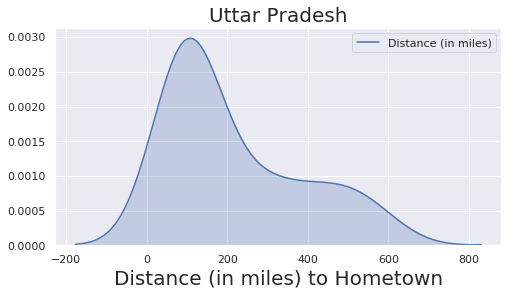

In [9]:
#Probability Distribution Function of Uttar Pradesh ('Distance in miles')
plt.figure(figsize=(8,4))
sns.kdeplot(data=data1['Distance (in miles)'].loc[data1['Current Destination']=='Uttar Pradesh'],shade=True)
plt.title("Uttar Pradesh",size=20)
plt.xlabel("Distance (in miles) to Hometown",size=20)
data1['Distance (in miles)'].loc[data1['Current Destination']=='Uttar Pradesh'].describe()

count     50.000000
mean     197.412500
std      133.822637
min       62.500000
25%      103.125000
50%      149.375000
75%      221.875000
max      563.125000
Name: Distance (in miles), dtype: float64

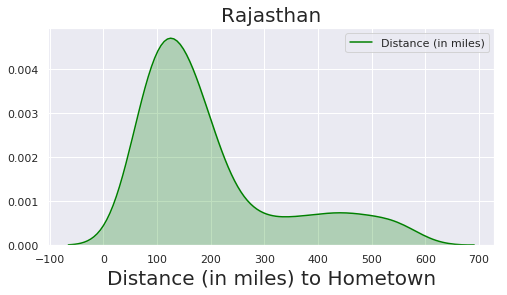

In [10]:
#Probability Distribution Function of Rajasthan ('Distance in Miles')
plt.figure(figsize=(8,4))
sns.kdeplot(data=data1['Distance (in miles)'].loc[data1['Current Destination']=='Rajasthan'],shade=True,color='Green')
plt.title("Rajasthan",size=20)
plt.xlabel("Distance (in miles) to Hometown",size=20)
data1['Distance (in miles)'].loc[data1['Current Destination']=='Rajasthan'].describe()

count     50.000000
mean     252.575000
std      161.843042
min       62.500000
25%      112.656250
50%      205.000000
75%      379.218750
max      595.625000
Name: Distance (in miles), dtype: float64

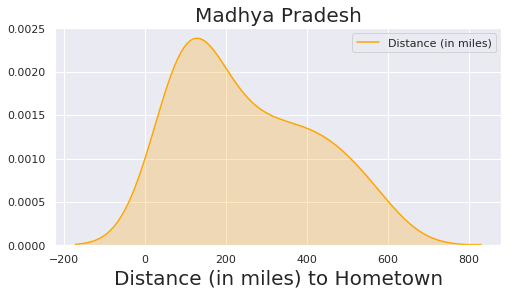

In [11]:
#Probability Distribution Function of Madhya Pradesh ('Distance in Miles')
plt.figure(figsize=(8,4))
sns.kdeplot(data=data1['Distance (in miles)'].loc[data1['Current Destination']=='Madhya Pradesh'],shade=True,color='Orange')
plt.title("Madhya Pradesh",size=20)
plt.xlabel("Distance (in miles) to Hometown",size=20)
data1['Distance (in miles)'].loc[data1['Current Destination']=='Madhya Pradesh'].describe()

### <span style='font-family:"Times New Roman"'>Step 1: Creating 3 common destinations at major locations of the curve ...
### <span style='font-family:"Times New Roman"'>Step 2: Classifying the migrants population on 3 basis : 25%   50%   75% ...
### <span style='font-family:"Times New Roman"'>Step 3: Estimating the transportation cost ...
### <span style='font-family:"Times New Roman"'>Step 4: Creating new dataset ...

In [6]:
col=[]
for i in data1['Current Destination'].unique():
    x=[]
    x.append(data1['Distance (in miles)'].loc[data1['Current Destination']==i].describe()[4])
    x.append(data1['Distance (in miles)'].loc[data1['Current Destination']==i].describe()[5])
    x.append(data1['Distance (in miles)'].loc[data1['Current Destination']==i].describe()[6])
    col.append(x)
data3=pd.DataFrame()
data3['Number of Migrants']=data2['Number of Migrants']
data3['Current Destination']=data1['Current Destination'].unique()
data3['Common Destinations (in miles)']=col
col2=[]
for w in range (35):
    a=data3['Number of Migrants']*0.25*data3['Common Destinations (in miles)'].loc[w][0]*0.6
    b=data3['Number of Migrants']*0.50*data3['Common Destinations (in miles)'].loc[w][1]*0.6
    c=data3['Number of Migrants']*0.25*data3['Common Destinations (in miles)'].loc[w][2]*0.6
    col2.append(a+b+c)
data3['Transportation Cost']=col2

In [7]:
data3.head(21)

,Number of Migrants,Current Destination,Common Destinations (in miles),Transportation Cost
0,2459,Andaman and Nicobar Islands,"[115.625, 303.125, 437.1875]",0 4.275202e+05 1 2.747847e+06 2 2....
1,15805,Andhra Pradesh,"[97.65625, 156.5625, 284.21875]",0 256350.75 1 1647671.25 2 166706...
2,15991,Arunachal Pradesh,"[158.75, 253.125, 353.75]",0 3.757659e+05 1 2.415202e+06 2 2....
3,15946,Assam,"[165.3125, 237.8125, 330.15625]",0 3.581879e+05 1 2.302221e+06 2 2....
4,19170,Bihar,"[136.875, 136.875, 136.875]",0 201945.375 1 1297985.625 2 1313...
5,15631,Chandigarh,"[119.0625, 164.375, 225.0]",0 2.481669e+05 1 1.595070e+06 2 1....
6,14465,Chhattisgarh,"[129.21875, 211.875, 308.90625]",0 3.179026e+05 1 2.043290e+06 2 2....
7,9473,Dadra and Nagar Haveli and Daman and Diu,"[165.3125, 270.0, 334.0625]",0 3.833735e+05 1 2.464098e+06 2 2....
8,16904,Delhi,"[136.875, 136.875, 136.875]",0 201945.375 1 1297985.625 2 1313...
9,16755,Goa,"[136.875, 136.875, 136.875]",0 201945.375 1 1297985.625 2 1313...


### https://www.thehindu.com/news/national/migrant-labourers-are-the-most-disenfranchised-invisible-citizens/article31717502.ece?homepage=true

### Workers from different sectors approximation
#### sex_workers='4.5 million'
#### Total_workers_now =45535360

In [8]:
g=data3['Transportation Cost'].sum()
g.sum()

2199601845.0

## <span style='background :lemonchiffon'><span style='font-family:"Times New Roman"'> Estimating Transportation Cost:
## <span style='background :beige'><span style='font-family:"Times New Roman"'>2199601845.00 ₹</span>

### <span style='font-family:"Times New Roman"'>Number of Passenger Trains in India: 13452
### <span style='font-family:"Times New Roman"'>Capacity of One Passenger Train: (72x8) + (90x3) (11 boggies on average considering sleeper + general coach)
## <span style='background :bisque'><span style='font-family:"Times New Roman"'>Due to Covid-19: Constraint = 1 seat per 3 seats</span>
### <span style='font-family:"Times New Roman"'>Total_Capacity= 10760*(846/3)=3034320( Assuming 80% of the train would be functional)
### <span style='font-family:"Times New Roman"'>Number_of_Migrants=535360+some workers from unorganised sector 
### <span style='font-family:"Times New Roman"'>Total_days_to_complete_operation=Total workers/Total_capacity

In [10]:
Total_days_to_complete_operation=45535360/3034320
Total_days_to_complete_operation

15

## <span style='background :lemonchiffon'><span style='font-family:"Times New Roman"'>Estimating Total Duration of Operation: 
## <span style='background :beige'><span style='font-family:"Times New Roman"'>15 Days</span>